In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [ ]:
import pickle

In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
!ls

/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
MobileNet_100epoch_1fold_no_accuracyGraph.png  MobileNet_Kfold_history_2.csv
MobileNet_100epoch_1fold_no_LossGraph.png      MobileNet_Kfold_history_3.csv
MobileNet_100epoch_2fold_no_accuracyGraph.png  MobileNet_Kfold_history_4.csv
MobileNet_100epoch_2fold_no_LossGraph.png      MobileNet_Kfold_history_5.csv
MobileNet_100epoch_3fold_no_accuracyGraph.png  Testing
MobileNet_100epoch_3fold_no_LossGraph.png      Training
MobileNet_100epoch_4fold_no_accuracyGraph.png  X_test.pickle
MobileNet_100epoch_4fold_no_LossGraph.png      X_train.pickle
MobileNet_100epoch_5fold_no_accuracyGraph.png  Y_test.pickle
MobileNet_100epoch_5fold_no_LossGraph.png      Y_train.pickle
MobileNet_Kfold_history_1.csv


In [ ]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [ ]:
import numpy as np
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
y = np.array(Y_train)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd

from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model
import tensorflow as tf

In [ ]:
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet25_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

Epoch 1/100
73/73 [==============================] - 12s 102ms/step - loss: 0.3718 - accuracy: 0.8576 - val_loss: 3.8570 - val_accuracy: 0.6130
Epoch 2/100
73/73 [==============================] - 6s 89ms/step - loss: 0.1926 - accuracy: 0.9333 - val_loss: 9.4312 - val_accuracy: 0.5195
Epoch 3/100
73/73 [==============================] - 7s 90ms/step - loss: 0.1199 - accuracy: 0.9558 - val_loss: 1.4780 - val_accuracy: 0.8169
Epoch 4/100
73/73 [==============================] - 7s 99ms/step - loss: 0.0912 - accuracy: 0.9628 - val_loss: 3.4263 - val_accuracy: 0.7649
Epoch 5/100
73/73 [==============================] - 6s 88ms/step - loss: 0.0885 - accuracy: 0.9688 - val_loss: 15.2757 - val_accuracy: 0.4649
Epoch 6/100
73/73 [==============================] - 7s 91ms/step - loss: 0.1590 - accuracy: 0.9494 - val_loss: 16.9348 - val_accuracy: 0.5026
Epoch 7/100
73/73 [==============================] - 7s 93ms/step - loss: 0.0959 - accuracy: 0.9632 - val_loss: 10.7552 - val_accuracy: 0.4909
E

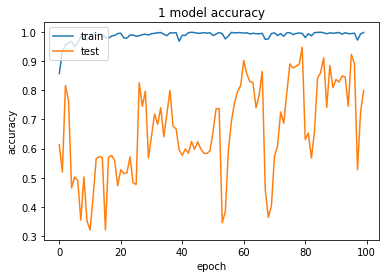

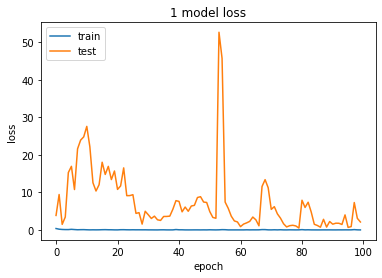

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet25_[   0    1    2 ... 3077 3078 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 1: loss of 1.9055702686309814; accuracy of 79.05844449996948%
49/49 [==============================] - 4s 66ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       928
           1       0.93      1.00      0.96       954
           2       0.43      1.00      0.60       410
           3       0.98      0.73      0.84       788

    accuracy                           0.80      3080
   macro avg       0.84      0.82      0.78      3080
weighted avg       0.90      0.80      0.81      3080

13/13 [==============================] - 1s 85ms/step
Classification report on Test data:-1
              precision    recall  f1-score 

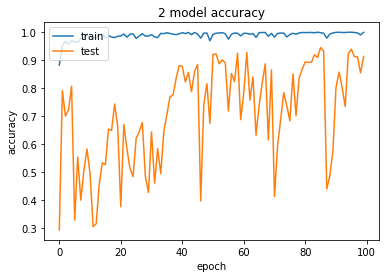

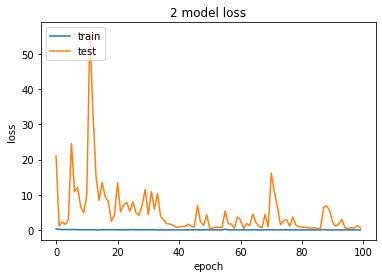

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet25_[   0    1    2 ... 3076 3077 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 2: loss of 0.3288244605064392; accuracy of 93.99350881576538%
49/49 [==============================] - 4s 66ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       928
           1       1.00      0.95      0.98       954
           2       0.99      0.76      0.86       410
           3       0.88      0.99      0.93       788

    accuracy                           0.95      3080
   macro avg       0.95      0.92      0.93      3080
weighted avg       0.95      0.95      0.95      3080

13/13 [==============================] - 1s 66ms/step
Classification report on Test data:-2
              precision    recall  f1-score 

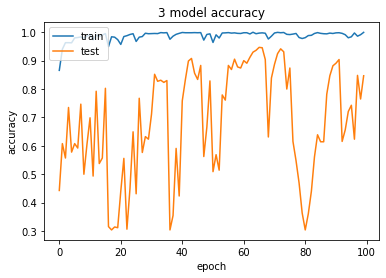

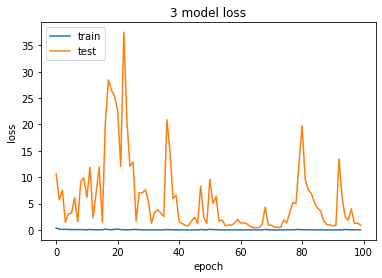

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet25_[   2    3    4 ... 3075 3077 3078]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 3: loss of 0.5151458978652954; accuracy of 89.77272510528564%
49/49 [==============================] - 4s 67ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       928
           1       1.00      0.82      0.90       954
           2       0.58      0.98      0.73       410
           3       0.95      0.90      0.92       788

    accuracy                           0.89      3080
   macro avg       0.88      0.91      0.88      3080
weighted avg       0.93      0.89      0.90      3080

13/13 [==============================] - 1s 66ms/step
Classification report on Test data:-3
              precision    recall  f1-score 

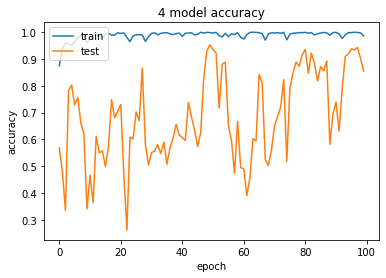

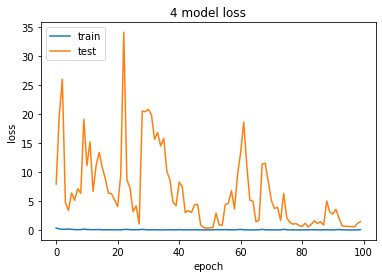

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet25_[   0    1    2 ... 3076 3078 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 4: loss of 0.7664583921432495; accuracy of 89.77272510528564%
49/49 [==============================] - 4s 66ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       928
           1       0.91      1.00      0.95       954
           2       0.99      0.39      0.56       410
           3       0.76      0.95      0.84       788

    accuracy                           0.89      3080
   macro avg       0.92      0.82      0.83      3080
weighted avg       0.91      0.89      0.88      3080

13/13 [==============================] - 1s 70ms/step
Classification report on Test data:-4
              precision    recall  f1-score 

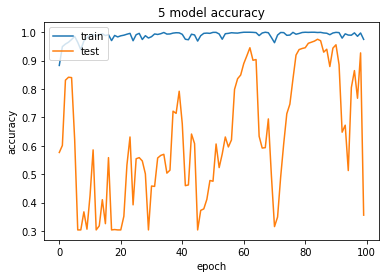

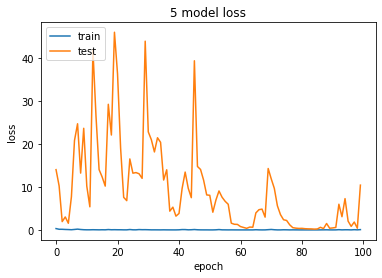

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet25_[   0    1    3 ... 3077 3078 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 5: loss of 9.520936965942383; accuracy of 37.5%
49/49 [==============================] - 4s 66ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       928
           1       0.33      1.00      0.50       954
           2       1.00      0.04      0.07       410
           3       0.98      0.22      0.36       788

    accuracy                           0.37      3080
   macro avg       0.58      0.31      0.23      3080
weighted avg       0.49      0.37      0.26      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 1s 66ms/step
Classification report on Test data:-5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.33      1.00      0.50       238
           2       1.00      0.03      0.06       103
           3       0.96      0.23      0.37       197

    accuracy                           0.37       772
   macro avg       0.57      0.31      0.23       772
weighted avg       0.48      0.37      0.25       772

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Validation Loss: 1.9055702686309814 - Validation Accuracy: 79.05844449996948%
------------------------------------------------------------------------
> Fold 2 - Validation Loss: 0.3288244605064392 - Validation Accuracy: 93.99350881576538%
-------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 100
train = 25

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

  CLASSES = 4
  x = base_model.output
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(CLASSES, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in model.layers[0:int(len(model.layers)/4)]:
    layer.trainable = False  # should be False

  for layer in model.layers[int(len(model.layers)/4):]:
    layer.trainable = True  # should be True

  optm = optimizers.Adam(learning_rate=0.001)    
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  #logs = f'/content/gdrive/MyDrive/Colab Notebooks/Logs/MobileNet_Kfold/fold_no_{fold_no}/'
  logs = f'/content/gdrive/MyDrive/Logs/MobileNet_Kfold/MobileNet25_{train}_{epochs}/fold_no_{fold_no}/'
  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [TensorBoard
                          (log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False)],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet25_{train}_epochs_{epochs}/'
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'MobileNet25_Kfold_history_{train}_fold_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 

In [ ]:
# freezing 25% of the bottom layers